가이바이보 분류 딥러닝 / Keras

In [88]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.16.2
1.26.4


이미지 데이터 디렉토리 형태 :
└── rock_scissor_paper
    ├── rock
        └── rock.zip
    ├── scissor
        └── scissor.zip
    ├── paper
        └── paper.zip
    └── test

# 원하는 디렉토리로 이동 =3
$ cd  ~/aiffel/rock_scissor_paper/rock

# 압축 해제 명령어 : unzip <파일명>.zip
$ unzip rock.zip

# 가위, 보에 대해서도 똑같이 실행!
$ cd  ~/aiffel/rock_scissor_paper/scissor
$ unzip scissor.zip

$ cd  ~/aiffel/rock_scissor_paper/paper
$ unzip paper.zip

In [89]:
#다운로드 받은 이미지는 크기는 무엇일까요? "nxn"(n은 정수)의 형태
import os
image_path = os.path.expanduser('~/Downloads/data/paper/0.jpg')
image = tf.io.read_file(image_path)
image_decoded = tf.image.decode_jpeg(image, channels=3)
print(image_decoded.shape)  # (height, width, channels)

(224, 224, 3)


In [90]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [91]:
from PIL import Image
import numpy as np
import os, glob

def load_data(img_path, number_of_data=300):
    img_size = 128 #28  # Target image size
    imgs = np.zeros((number_of_data, img_size, img_size, 3), dtype=np.int32)
    labels = np.zeros((number_of_data,), dtype=np.int32)
    
    idx = 0
    for label, folder_name in enumerate(['rock', 'scissor', 'paper']):
        files = glob.glob(os.path.join(img_path, folder_name, '*.jpg'))
        for file in files:
            # {file}...")
            if idx >= number_of_data:
                break
            img = Image.open(file).resize((img_size, img_size))  # Resize here
            imgs[idx] = np.array(img, dtype=np.int32)
            labels[idx] = label
            idx += 1
    
    return imgs, labels


image_dir_path = os.getenv("HOME") + "/Downloads/data"
print("이미지 데이터 로딩 시작...")
(x_train, y_train)=load_data(image_dir_path)
x_train = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화 / was : x_train_norm

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

이미지 데이터 로딩 시작...
x_train shape: (300, 128, 128, 3)
y_train shape: (300,)


라벨:  0
(300, 128, 128, 3)
(300,)
[0 1 2]


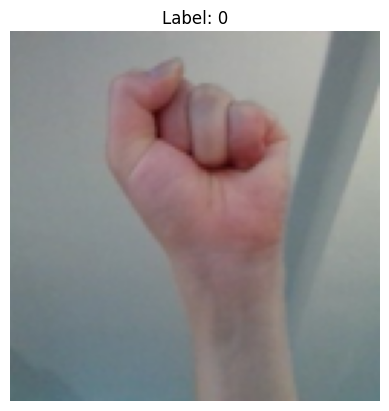

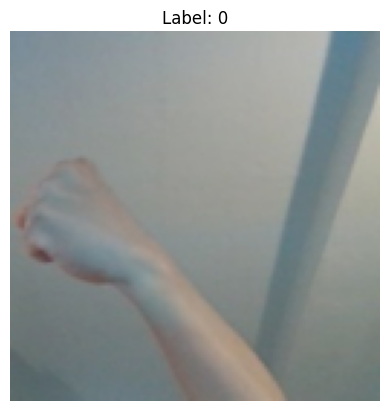

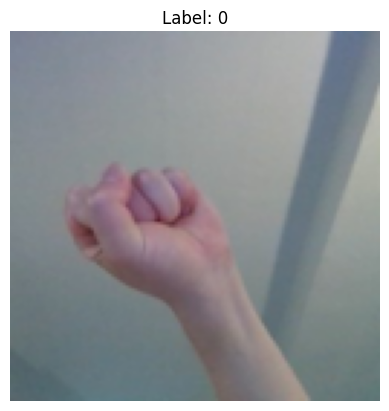

In [92]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1])
print('라벨: ', y_train[1])

#checking also:
print(x_train.shape)  # Should be (N, 28, 28, 3)
print(y_train.shape)  # Should be (N,)
print(np.unique(y_train))  # Should be [0, 1, 2]

for i in range(3):
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.show()  

        

In [93]:
# import tensorflow as tf
# from tensorflow import keras
# import numpy as np

# n_channel_1=32
# n_channel_2=32
# n_dense=16
# n_train_epoch=100

# model=keras.models.Sequential()
# model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(128,128,3))) # 28,28,3
# model.add(keras.layers.MaxPool2D(2,2))

# model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2)))

# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(n_dense, activation='relu'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(3, activation='softmax'))

# model.summary()

In [94]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # 클래스 수가 3개(가위, 바위, 보)
])
model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,706,051 (14.14 MB)

 Trainable params: 3,706,051 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.3955 - loss: 1.4405 - val_accuracy: 0.0000e+00 - val_loss: 1.7098
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 282ms/step - accuracy: 0.4392 - loss: 1.0405 - val_accuracy: 0.0000e+00 - val_loss: 1.7170
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step - accuracy: 0.4577 - loss: 1.0481 - val_accuracy: 0.0000e+00 - val_loss: 2.0773
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 285ms/step - accuracy: 0.4766 - loss: 1.0481 - val_accuracy: 0.0000e+00 - val_loss: 2.0413
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.4543 - loss: 0.9967 - val_accuracy: 0.0000e+00 - val_loss: 2.0139
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - accuracy: 0.7113 - loss: 0.7830 - val_accuracy: 0.9833 - val_loss: 0.3955
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - accuracy: 0.7018 - loss: 0.7276 - val_accuracy: 0.5667 - val_loss: 0.9168
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 297ms/step - accuracy: 0.8700 - loss: 0.4573 - val_accuracy

In [95]:
test_image_dir_path = os.getenv("HOME") + "/Downloads/data/test"
print("이미지 데이터 로딩 시작...")
#(x_test, y_test)=load_data(test_image_dir_path)
#x_test = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화 / was : x_tes_norm
x_data, y_data = load_data(image_dir_path)
x_data = x_data / 255.0

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

이미지 데이터 로딩 시작...
x_test shape: (60, 128, 128, 3)
y_test shape: (60,)


In [96]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

2/2 - 0s - 84ms/step - accuracy: 0.9667 - loss: 0.1437
test_loss: 0.14371000230312347 
test_accuracy: 0.9666666388511658
